In [1]:
import gzip
import pickle 
import mplhep as hep
hep.style.use("CMS")
import matplotlib
matplotlib.rc('font', size=15)
import numpy as np
import torch 
import dgl
import pandas as pd
import numpy as np
import plotly.express as px
import sys
sys.path.append("/afs/cern.ch/work/m/mgarciam/private/Tracking_wcoc/")
from sklearn.cluster import DBSCAN
from torch_scatter import scatter_max, scatter_add, scatter_mean
from scipy.optimize import linear_sum_assignment
import numpy as np
import matplotlib.pyplot as plt

/afs/cern.ch/work/m/mgarciam/private/miniconda/miniconda3/envs/graphgps0/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_wcoc/models/180324_Zcard_v_full/showers_df_evaluation/0_0_0_Ztt2410_1_5000.pt"
# sd_hgb0 = pd.read_pickle(path_hgcal) # this one was created without hdbscan
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_wcoc/models/180324_Zcard_v_full/showers_df_evaluation/0_0_00_0_0_Ztt_5000_8000_v1.pt"
sd_hgb1 = pd.read_pickle(path_hgcal)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_wcoc/models/180324_Zcard_v_full/showers_df_evaluation/0_0_0Ztt_8000_12000_v1.pt"
sd_hgb2 = pd.read_pickle(path_hgcal)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_wcoc/models/180324_Zcard_v_full/showers_df_evaluation/0_0_0Ztt_12k13k.pt"
sd_hgb3 = pd.read_pickle(path_hgcal)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_wcoc/models/180324_Zcard_v_full/showers_df_evaluation/0_0_0_Ztt_13_2k_13_4k_1411.pt"
sd_hgb4 = pd.read_pickle(path_hgcal)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_wcoc/models/180324_Zcard_v_full/showers_df_evaluation/0_0_0_Ztt_13k_13_2k_1411.pt"
sd_hgb5 = pd.read_pickle(path_hgcal)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_wcoc/models/180324_Zcard_v_full/showers_df_evaluation/0_0_0_Ztt_13_2k_13_4k_1411.pt"
sd_hgb6 = pd.read_pickle(path_hgcal)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_wcoc/models/180324_Zcard_v_full/showers_df_evaluation/0_0_0_Ztt_13_4k_13_6k_1511.pt"
sd_hgb7 = pd.read_pickle(path_hgcal)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_wcoc/models/180324_Zcard_v_full/showers_df_evaluation/0_0_0_Ztt_13_6k_13_8k_1511.pt"
sd_hgb8 = pd.read_pickle(path_hgcal)
allsd  = pd.concat([sd_hgb1, sd_hgb2,sd_hgb3, sd_hgb4, sd_hgb5, sd_hgb6, sd_hgb7, sd_hgb8])




In [3]:
from src.utils.inference.pandas_helpers import open_mlpf_dataframe
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_0_Ztt2410_3000_6000.pt"
sd_hgb_CLD0, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_00_0_0_Ztt_6000_8000_v1.pt"
sd_hgb_CLD1, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_0_Ztt_8000_10000.pt"
sd_hgb_CLD2, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_0_Ztt_10000_12000.pt"
sd_hgb_CLD3, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_0_Ztt_12_01k12_1k_0411.pt"
sd_hgb_CLD4, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_0_Ztt_12_11k12_2k_0411.pt"
sd_hgb_CLD5, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_0_Ztt_12_21k12_5k_0411.pt"
sd_hgb_CLD6, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_0_Ztt_12_51k12_200k_0411.pt"
sd_hgb_CLD7, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_0_Ztt_12_200k_12_250k_1411.pt"
sd_hgb_CLD8, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_0_Ztt_12_250k_12_4k_1511.pt"
sd_hgb_CLD9, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_0_Ztt_12_4k_12_5k_2811.pt"
sd_hgb_CLD10, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
sd_hgb  = pd.concat([sd_hgb_CLD0,sd_hgb_CLD1, sd_hgb_CLD2, sd_hgb_CLD3,sd_hgb_CLD4,sd_hgb_CLD5, sd_hgb_CLD6, sd_hgb_CLD7, sd_hgb_CLD8, sd_hgb_CLD9, sd_hgb_CLD10])


path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_1_Ztt2410_3000_6000.pt"
sd_hgb_ct_CLD0, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_10_0_0_Ztt_6000_8000_v1.pt"
sd_hgb_ct_CLD1, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_1_Ztt_8000_10000.pt"
sd_hgb_ct_CLD2, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_1_Ztt_10000_12000.pt"
sd_hgb_ct_CLD3, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_1_Ztt_12_01k12_1k_0411.pt"
sd_hgb_ct_CLD4, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_1_Ztt_12_11k12_2k_0411.pt"
sd_hgb_ct_CLD5, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_1_Ztt_12_21k12_5k_0411.pt"
sd_hgb_ct_CLD6, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_1_Ztt_12_51k12_200k_0411.pt"
sd_hgb_ct_CLD7, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_1_Ztt_12_200k_12_250k_1411.pt"
sd_hgb_ct_CLD8, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_1_Ztt_12_250k_12_4k_1511.pt"
sd_hgb_ct_CLD9, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
sd_hgb_ct  = pd.concat([sd_hgb_ct_CLD0,sd_hgb_ct_CLD1, sd_hgb_ct_CLD2, sd_hgb_ct_CLD3,sd_hgb_ct_CLD4,sd_hgb_ct_CLD5,sd_hgb_ct_CLD6, sd_hgb_ct_CLD7,sd_hgb_ct_CLD8, sd_hgb_ct_CLD9])


/afs/cern.ch/work/m/mgarciam/private/Tracking_wcoc/src/utils/inference/pandas_helpers.py:48: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  mask = (~np.isnan(sd["pred_showers_E"])) * (~np.isnan(sd["reco_showers_E"]))
/afs/cern.ch/work/m/mgarciam/private/Tracking_wcoc/src/utils/inference/pandas_helpers.py:48: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  mask = (~np.isnan(sd["pred_showers_E"])) * (~np.isnan(sd["reco_showers_E"]))
/afs/cern.ch/work/m/mgarciam/private/Tracking_wcoc/src/utils/inference/pandas_helpers.py:48: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  mask = (~np.isnan(sd["pred_showers_E"])) * (~np.isnan(sd["reco_showers_E"]))
/afs/cern.ch/work/m/mgarciam/private/Tracking_wcoc/src/utils/inference/pandas_helpers.py:48: U

In [4]:

def create_eff_dic(matched_, reco_delta, log, num_hits_min=0, num_hits_max=5000, purity=False):
    mask1 = matched_["reco_showers_E"] > num_hits_min
    mask2 = matched_["reco_showers_E"] < num_hits_max
    matched_ = matched_[mask1 * mask2]
    df_id = matched_
    photons_dic = calculate_eff(df_id, log, purity=purity)
    # photons_dic = calculate_eff_tau(df_id, log, purity, photons_dic)
    photons_dic = calculate_eff_DeltaMC(reco_delta,photons_dic)
    return photons_dic



def calculate_eff_tau(sd, log_scale=False, purity=False, photons_dic=None):
    # if log_scale:
    #     bins = np.exp(np.arange(np.log(0.0001), np.log(50), 0.5))
    # else:
    bins = np.arange(0, 51, 5)
    #bins = np.exp(np.arange(np.log(1e-1), np.log(50), 0.2))
    # bins = [5e-3,0.1,1.80804241e-01,2.98095799e-01, 4.91476884e-01, 8.10308393e-01, 1.33597268e+00,2.20264658e+00, 3.63155027e+00, 5.98741417e+00, 9.87157710e+00,1.62754791e+01, 2.68337287e+01, 4.42413392e+01]
    bins = np.array(bins)
    eff = []
    energy_eff = []
    size_energy_bin = []
    errors = []
    total_showers_ = []
    number_of_hits = []
    number_of_hits_var = []
    for i in range(len(bins) - 1):
        bin_i = bins[i]
        bin_i1 = bins[i + 1]
        mask_above = sd.tau_mom.values <= bin_i1
        mask_below = sd.tau_mom.values > bin_i
        mask = mask_below * mask_above
        mask_non_nan = ~np.isnan(sd.e_pred_and_truth.values)
        number_of_non_reconstructed_showers = np.sum(
            np.isnan(sd.pred_showers_E.values)[mask]
        )
        total_showers = len(sd.pred_showers_E.values[mask])
        if total_showers > 0:
            # eff.append(
            #     (total_showers - number_of_non_reconstructed_showers) / total_showers
            # )

            particle_purity = sd["e_pred_and_truth"][mask].values/sd["reco_showers_E"][mask].values
            track_purity = sd["e_pred_and_truth"][mask].values/sd["pred_showers_E"][mask].values
            
            # total_reconstructed_cld_crit =  np.sum((particle_purity>=0.5)*(track_purity>=0.5))
            # if purity:
            #     total_reconstructed_cld_crit =  np.sum((track_purity>=0.75))
            # else:
            #     total_reconstructed_cld_crit =  np.sum((particle_purity>=0.5)*(track_purity>=0.5))
            total_reconstructed_cld_crit = np.sum(sd["e_pred_and_truth"][mask].values>4)
            eff.append(total_reconstructed_cld_crit/total_showers)
            energy_eff.append((bin_i1 + bin_i) / 2)
            size_energy_bin.append((bin_i1-bin_i)/2)
            total_showers_.append(total_showers)

            percentage_of_hits_MC = sd["e_pred_and_truth"][mask*mask_non_nan].values/sd["reco_showers_E"][mask*mask_non_nan].values
            number_of_hits.append(np.mean(percentage_of_hits_MC))

            n_r = sd["e_pred_and_truth"][mask*mask_non_nan].values
            n_t = sd["reco_showers_E"][mask*mask_non_nan].values
            error_percentage_of_hits = (n_r/(n_t**2)*np.sqrt(n_t))**2+(1/n_t*np.sqrt(n_r))**2
            N = len(error_percentage_of_hits)
            number_of_hits_var.append(1/N*np.sqrt(np.sum(error_percentage_of_hits)))
            n_total = total_showers
            n_r = total_reconstructed_cld_crit #total_showers - number_of_non_reconstructed_showers
            error = (n_r/(n_total**2)*np.sqrt(n_total))**2+(1/n_total*np.sqrt(n_r))**2
            error = np.sqrt(error)
            errors.append(error)
        if (bin_i>19) and (bin_i1<30):
            print(
                "bin",
                bin_i1,
                bin_i,
                (total_showers - number_of_non_reconstructed_showers) / total_showers,
                total_showers,
                (total_showers - number_of_non_reconstructed_showers),
                error
            )
        photons_dic["eff_tau"] = eff
        photons_dic["energy_eff_tau"] = energy_eff
        photons_dic["total_showers__tau"] = total_showers_
        photons_dic["size_energy_bin_tau"] = size_energy_bin
        photons_dic["errors_tau"] = errors
        photons_dic["number_of_hits_tau"] = number_of_hits
        photons_dic["number_of_hits_var_tau"]= number_of_hits_var 

    return photons_dic


def calculate_eff(sd, log_scale=False, purity=False):
    # if log_scale:
    #     bins = np.exp(np.arange(np.log(0.0001), np.log(50), 0.5))
    # else:
    #     bins = np.arange(0, 51, 2)
    bins = np.exp(np.arange(np.log(1e-1), np.log(50), 0.2))
    # bins = [5e-3,0.1,1.80804241e-01,2.98095799e-01, 4.91476884e-01, 8.10308393e-01, 1.33597268e+00,2.20264658e+00, 3.63155027e+00, 5.98741417e+00, 9.87157710e+00,1.62754791e+01, 2.68337287e+01, 4.42413392e+01]
    bins = np.array(bins)
    eff = []
    energy_eff = []
    size_energy_bin = []
    errors = []
    total_showers_ = []
    number_of_hits = []
    number_of_hits_var = []
    for i in range(len(bins) - 1):
        bin_i = bins[i]
        bin_i1 = bins[i + 1]
        mask_above = sd.true_showers_pt.values <= bin_i1
        mask_below = sd.true_showers_pt.values > bin_i
        mask = mask_below * mask_above
        mask_non_nan = ~np.isnan(sd.e_pred_and_truth.values)
        number_of_non_reconstructed_showers = np.sum(
            np.isnan(sd.pred_showers_E.values)[mask]
        )
        total_showers = len(sd.pred_showers_E.values[mask])
        if total_showers > 0:
            # eff.append(
            #     (total_showers - number_of_non_reconstructed_showers) / total_showers
            # )

            particle_purity = sd["e_pred_and_truth"][mask].values/sd["reco_showers_E"][mask].values
            track_purity = sd["e_pred_and_truth"][mask].values/sd["pred_showers_E"][mask].values
            
            # total_reconstructed_cld_crit =  np.sum((particle_purity>=0.5)*(track_purity>=0.5))
            if purity:
                total_reconstructed_cld_crit =  np.sum((track_purity>=0.75))
            else:
                total_reconstructed_cld_crit =  np.sum((particle_purity>=0.5)*(track_purity>=0.5))
            eff.append(total_reconstructed_cld_crit/total_showers)
            energy_eff.append((bin_i1 + bin_i) / 2)
            size_energy_bin.append((bin_i1-bin_i)/2)
            total_showers_.append(total_showers)

            percentage_of_hits_MC = sd["e_pred_and_truth"][mask*mask_non_nan].values/sd["reco_showers_E"][mask*mask_non_nan].values
            number_of_hits.append(np.mean(percentage_of_hits_MC))

            n_r = sd["e_pred_and_truth"][mask*mask_non_nan].values
            n_t = sd["reco_showers_E"][mask*mask_non_nan].values
            error_percentage_of_hits = (n_r/(n_t**2)*np.sqrt(n_t))**2+(1/n_t*np.sqrt(n_r))**2
            N = len(error_percentage_of_hits)
            number_of_hits_var.append(1/N*np.sqrt(np.sum(error_percentage_of_hits)))
            n_total = total_showers
            n_r = total_reconstructed_cld_crit #total_showers - number_of_non_reconstructed_showers
            error = (n_r/(n_total**2)*np.sqrt(n_total))**2+(1/n_total*np.sqrt(n_r))**2
            error = np.sqrt(error)
            errors.append(error)
        if (bin_i>19) and (bin_i1<30):
            print(
                "bin",
                bin_i1,
                bin_i,
                (total_showers - number_of_non_reconstructed_showers) / total_showers,
                total_showers,
                (total_showers - number_of_non_reconstructed_showers),
                error
            )
        photons_dic = {}
        photons_dic["eff"] = eff
        photons_dic["energy_eff"] = energy_eff
        photons_dic["total_showers_"] = total_showers_
        photons_dic["size_energy_bin"] = size_energy_bin
        photons_dic["errors"] = errors
        photons_dic["number_of_hits"] = number_of_hits
        photons_dic["number_of_hits_var"]= number_of_hits_var 

    return photons_dic


In [6]:
## CUTS
log = True
# plt.figure()
# mask_reco = allsd.reco_showers_E>15
mask_delta = allsd.delta_MC>0.02
mask_delta1 = allsd.delta_MC>0

mask_reco = allsd.reco_showers_E>15
mask_dc_hits = allsd.cdc_hits>2
mask_pt = allsd.true_showers_pt>5e-3
mask_pt_dc = allsd.true_showers_pt>1
mask_gen_status = allsd.gen_status==1
sd_hgb_IDEA = allsd[mask_reco*mask_delta*mask_dc_hits*mask_pt*mask_gen_status]
sd_hgb_IDEA_delta_MC = allsd[mask_reco*mask_delta1*mask_dc_hits*mask_pt_dc*mask_gen_status]

all_particles_IDEA = create_eff_dic(sd_hgb_IDEA,sd_hgb_IDEA_delta_MC, log, purity=False)


# log = True
# # plt.figure()
# # mask_reco = allsd.reco_showers_E>15
# mask_delta = allsd_old.delta_MC>0.02
# # mask_dc_hits = allsd.cdc_hits>4

# mask_reco = allsd_old.reco_showers_E>0
# mask_dc_hits = allsd_old.cdc_hits>2
# mask_pt = allsd_old.true_showers_pt>5e-3
# mask_gen_status = allsd_old.gen_status==1
# sd_hgb_IDEA_old = allsd_old[mask_reco*mask_delta*mask_dc_hits*mask_pt*mask_gen_status]

# all_particles_IDEAold = create_eff_dic(sd_hgb_IDEA_old, log, purity=True)



print("finished calculating eff for IDEA")
# mask_delta = sd_hgb.delta_MC>0.02
# mask_delta1 = sd_hgb.delta_MC>0
# mask_pt = sd_hgb.true_showers_pt>5e-3
# mask_R = sd_hgb.R<0.5
# mask_gen_status = sd_hgb.gen_status==1
# sd_hgb_CLD = sd_hgb[mask_delta*mask_pt*mask_gen_status*mask_R]
# sd_hgb_CLD1 = sd_hgb[mask_delta1*mask_pt*mask_gen_status*mask_R]
mask_R = sd_hgb["R"].values<0.05
mask_number_unique_hits =  sd_hgb["number_unique_hits"].values>3
mask_theta_lower = sd_hgb["theta"].values>(10/180*np.pi)
mask_theta_higher = sd_hgb["theta"].values<(170/180*np.pi)
mask_delta_MC = sd_hgb["delta_MC"].values>0.02
mask_delta_MC_1 = sd_hgb["delta_MC"].values>0
mask_pt = sd_hgb["true_showers_pt"].values>1
mask_gen_status = sd_hgb["gen_status"]==1
total_mask = mask_R*mask_theta_lower*mask_theta_higher*mask_delta_MC*mask_gen_status*mask_number_unique_hits
mask_delta_plot = mask_R*mask_theta_lower*mask_theta_higher*mask_pt*mask_gen_status*mask_number_unique_hits*mask_delta_MC_1
mask_no_R = mask_theta_lower*mask_theta_higher*mask_delta_MC*mask_pt*mask_gen_status*mask_number_unique_hits
total_mask_all_particles = mask_R*mask_theta_lower*mask_theta_higher*mask_delta_MC*mask_number_unique_hits
print(len(sd_hgb), len(sd_hgb[total_mask]))
reconstructable_ml = sd_hgb[total_mask]
reconstructable_ml_all_p = sd_hgb[total_mask_all_particles]
reco_R_ml   = sd_hgb[mask_no_R]
reco_delta_plot_ml = sd_hgb[mask_delta_plot]

# mask_delta = sd_hgb_1.delta_MC>0.02
# mask_pt = sd_hgb_1.true_showers_pt>5e-3
# mask_gen_status = sd_hgb_1.gen_status==1
# sd_hgb_CLD_1 = sd_hgb_1[mask_delta*mask_pt*mask_gen_status]

all_particles_CLD = create_eff_dic(reconstructable_ml,reco_delta_plot_ml, log, purity=False)
# all_particles_CLD_1 = create_eff_dic(sd_hgb_CLD_1, log, purity=False)


print("finished calculating eff for IDEA")
# mask_delta = sd_hgb_ct.delta_MC>0.02
# mask_delta1 = sd_hgb_ct.delta_MC>0
# mask_pt = sd_hgb_ct.true_showers_pt>5e-3
# mask_R = sd_hgb_ct.R<0.5
# mask_gen_status = sd_hgb_ct.gen_status==1
# sd_hgb_CLD_CT = sd_hgb_ct[mask_delta*mask_pt*mask_gen_status*mask_R]
# sd_hgb_CLD_CT1 = sd_hgb_ct[mask_delta1*mask_pt*mask_gen_status*mask_R]
mask_R = sd_hgb_ct["R"].values<0.05
mask_number_unique_hits =  sd_hgb_ct["number_unique_hits"].values>3
mask_theta_lower = sd_hgb_ct["theta"].values>(10/180*np.pi)
mask_theta_higher = sd_hgb_ct["theta"].values<(170/180*np.pi)
mask_delta_MC = sd_hgb_ct["delta_MC"].values>0.02
mask_delta_MC_1 = sd_hgb_ct["delta_MC"].values>0
mask_pt = sd_hgb_ct["true_showers_pt"].values>1
mask_gen_status = sd_hgb_ct["gen_status"]==1
total_mask_ct = mask_R*mask_theta_lower*mask_theta_higher*mask_delta_MC*mask_gen_status*mask_number_unique_hits
mask_delta_plot = mask_R*mask_theta_lower*mask_theta_higher*mask_pt*mask_gen_status*mask_number_unique_hits*mask_delta_MC_1
#mask_delta_plot = mask_pt*mask_gen_status*mask_number_unique_hits*mask_delta_MC_1
mask_no_R = mask_theta_lower*mask_theta_higher*mask_delta_MC*mask_pt*mask_gen_status*mask_number_unique_hits
total_mask_ct_all_partices = mask_R*mask_theta_lower*mask_theta_higher*mask_delta_MC*mask_number_unique_hits
print(len(sd_hgb_ct), len( sd_hgb_ct[total_mask_ct]))
reconstructable_ct = sd_hgb_ct[total_mask_ct]
reco_R_ct  = sd_hgb_ct[mask_no_R]
reco_delta_plot = sd_hgb_ct[mask_delta_plot]
reconstructable_ct_all_p = sd_hgb_ct[total_mask_ct_all_partices]

all_particles_CLD_CT = create_eff_dic(reconstructable_ct,reco_delta_plot, log, purity=True)
# all_particles_CLD_CT_1 = create_eff_dic(sd_hgb_CLD_CT_1, log, purity=True)


/tmp/mgarciam/ipykernel_96655/1544783118.py:13: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  sd_hgb_IDEA = allsd[mask_reco*mask_delta*mask_dc_hits*mask_pt*mask_gen_status]
/tmp/mgarciam/ipykernel_96655/1544783118.py:14: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  sd_hgb_IDEA_delta_MC = allsd[mask_reco*mask_delta1*mask_dc_hits*mask_pt_dc*mask_gen_status]
/tmp/mgarciam/ipykernel_96655/1524101270.py:4: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  matched_ = matched_[mask1 * mask2]


bin 27.0426407426154 22.14064162041882 0.9999271852344319 631740 631694 0.001778943990897898
0.0010000000000000002 0.0016487212707001285 1885 1954
0.0016487212707001285 0.0027182818284590456 4796 4950
0.0027182818284590456 0.004481689070338066 12662 12932
0.004481689070338066 0.007389056098930652 34484 34917
0.007389056098930652 0.012182493960703476 92837 93376
0.012182493960703476 0.020085536923187673 252246 252867
0.020085536923187673 0.03311545195869232 689770 690253
0.03311545195869232 0.05459815003314425 1845760 1846140
0.05459815003314425 0.09001713130052184 3507471 3507875
0.09001713130052184 0.14841315910257663 2661637 2661709
0.14841315910257663 0.24469193226422048 1216449 1216466
0.24469193226422048 0.4034287934927352 280760 280760
0.4034287934927352 0.665141633044362 32345 32345
0.665141633044362 1.096633158428459 17812 17812
finished calculating eff for IDEA


/tmp/mgarciam/ipykernel_96655/1544783118.py:51: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  total_mask = mask_R*mask_theta_lower*mask_theta_higher*mask_delta_MC*mask_gen_status*mask_number_unique_hits
/tmp/mgarciam/ipykernel_96655/1544783118.py:52: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  mask_delta_plot = mask_R*mask_theta_lower*mask_theta_higher*mask_pt*mask_gen_status*mask_number_unique_hits*mask_delta_MC_1
/tmp/mgarciam/ipykernel_96655/1544783118.py:53: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  mask_no_R = mask_theta_lower*mask_theta_higher*mask_delta_MC*mask_pt*mask_gen_status*mask_number_unique_hits


9180416 7707470
bin 27.0426407426154 22.14064162041882 0.9995333325287342 497142 496910 0.0020040611652240845
0.0010000000000000002 0.0016487212707001285 1502 1577
0.0016487212707001285 0.0027182818284590456 4065 4219
0.0027182818284590456 0.004481689070338066 10375 10714
0.004481689070338066 0.007389056098930652 27549 28262
0.007389056098930652 0.012182493960703476 74711 75404
0.012182493960703476 0.020085536923187673 202838 203421
0.020085536923187673 0.03311545195869232 552327 552934
0.03311545195869232 0.05459815003314425 1471420 1472377
0.05459815003314425 0.09001713130052184 2665428 2666676
0.09001713130052184 0.14841315910257663 1689596 1690272
0.14841315910257663 0.24469193226422048 698202 698651
0.24469193226422048 0.4034287934927352 175023 175180
0.4034287934927352 0.665141633044362 19797 19842
0.665141633044362 1.096633158428459 3399 3411
finished calculating eff for IDEA


/tmp/mgarciam/ipykernel_96655/1544783118.py:86: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  total_mask_ct = mask_R*mask_theta_lower*mask_theta_higher*mask_delta_MC*mask_gen_status*mask_number_unique_hits
/tmp/mgarciam/ipykernel_96655/1544783118.py:87: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  mask_delta_plot = mask_R*mask_theta_lower*mask_theta_higher*mask_pt*mask_gen_status*mask_number_unique_hits*mask_delta_MC_1
/tmp/mgarciam/ipykernel_96655/1544783118.py:89: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  mask_no_R = mask_theta_lower*mask_theta_higher*mask_delta_MC*mask_pt*mask_gen_status*mask_number_unique_hits


9168787 7161800
bin 27.0426407426154 22.14064162041882 0.9962789892696434 462240 460520 0.0020613280846774463
0.0010000000000000002 0.0016487212707001285 1252 1485
0.0016487212707001285 0.0027182818284590456 3303 3906
0.0027182818284590456 0.004481689070338066 8735 9961
0.004481689070338066 0.007389056098930652 24288 26258
0.007389056098930652 0.012182493960703476 66238 70046
0.012182493960703476 0.020085536923187673 179873 189364
0.020085536923187673 0.03311545195869232 497091 514331
0.03311545195869232 0.05459815003314425 1346101 1369149
0.05459815003314425 0.09001713130052184 2450941 2479705
0.09001713130052184 0.14841315910257663 1558455 1569042
0.14841315910257663 0.24469193226422048 643306 648318
0.24469193226422048 0.4034287934927352 159587 162170
0.4034287934927352 0.665141633044362 17935 18378
0.665141633044362 1.096633158428459 3075 3165


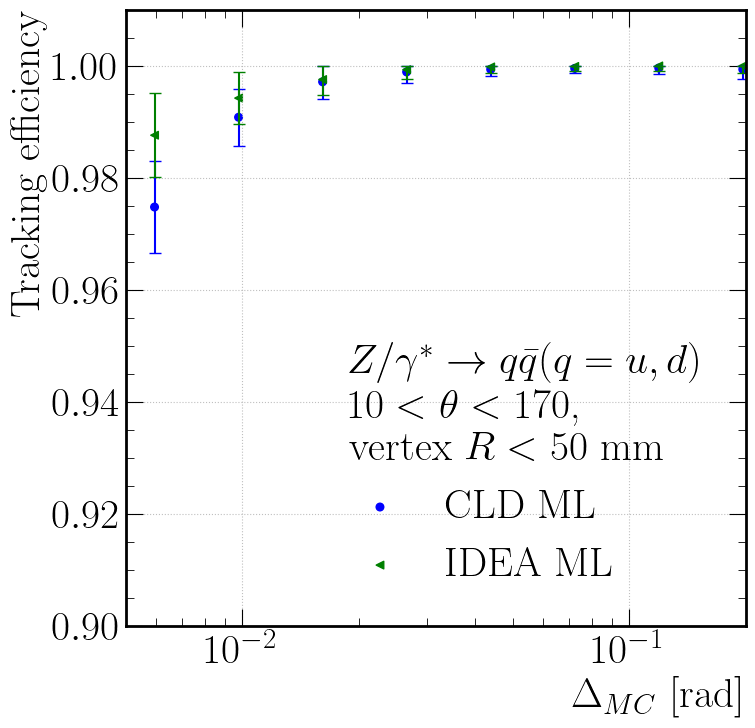

In [8]:
def limit_error_bars(y, yerr, upper_limit=1):
    yerr_upper = np.minimum(y + yerr, upper_limit) - y
    yerr_lower = yerr  # Lower error bars remain unchanged
    return yerr_lower, yerr_upper

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
fig= plt.figure( figsize=(8,8))
ax = fig.add_subplot(111)
colors_list = ["#FF0000", "#FF0000", "#0000FF"]
index = 0
j = 0
colors = [ "b", "g"]
marker = ["o", "<"]
labels = [ "CLD ML", "IDEA ML"]
dataframe_list = [all_particles_CLD,all_particles_IDEA]
i =0 
log = True
plt.xlabel(r"$\Delta_{MC}$ [rad]")
plt.ylabel("Tracking efficiency")

for i in range(0, len(dataframe_list)):
    plt.scatter(
        np.array(dataframe_list[i]["delta_MC_values"]),
        np.array(dataframe_list[i]["eff_delta_MC"]),
        label=labels[i] ,
        marker=marker[i],
        c = [colors[i] for j in range(0,len(dataframe_list[i]["eff_delta_MC"]))],
        s=30,
    )
    error_y = dataframe_list[i]["errors_delta_mc"]
    yerr_lower, yerr_upper = limit_error_bars(np.array(dataframe_list[i]["eff_delta_MC"]), np.array(error_y), upper_limit=1)
    plt.errorbar(dataframe_list[i]["delta_MC_values"], dataframe_list[i]["eff_delta_MC"] ,yerr= [yerr_lower, yerr_upper], ecolor=colors[i], linestyle='none', capsize=4)


# plt.title("CLD")
plt.legend(loc="lower right",title=r'$Z/\gamma^* \rightarrow q \bar q (q=u,d)$' "\n" r'$10< \theta< 170$,' "\n" r"$\textrm{vertex } R<50 \textrm{ mm}$")
plt.xscale("log")
# ax.xaxis.set_major_locator(plt.LogLocator(base=10.0, numticks=4))
# ax.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs='auto', numticks=10))
# ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
# ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
# ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')
# ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.grid(True)
plt.rc("text", usetex=True)
plt.rc("font", family="serif")
plt.xlim([5*1e-3,0.2])
plt.ylim([0.9,1.01])
# ax.axvline(x=0.1, linestyle='--')
size_font=30
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = size_font
plt.rcParams['axes.labelsize'] = size_font
plt.rcParams['xtick.labelsize'] = size_font
plt.rcParams['ytick.labelsize'] = size_font
plt.rcParams['legend.fontsize'] = 30
leg = ax.get_legend()
leg._legend_box.align = "left"

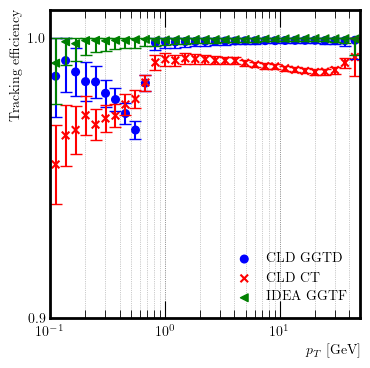

In [11]:
def limit_error_bars(y, yerr, upper_limit=1):
    yerr_upper = np.minimum(y + yerr, upper_limit) - y
    yerr_lower = yerr  # Lower error bars remain unchanged
    return yerr_lower, yerr_upper
fig= plt.figure( figsize=(4, 4))
axs = fig.add_subplot(111)
colors_list = ["#FF0000", "#FF0000", "#0000FF"]
index = 0
j = 0
colors = [ "b", "r", "g", "y"]
marker = ["o", "x", "<", "s"]
labels = [ "CLD GGTD", "CLD CT", "IDEA GGTF"]
dataframe_list = [all_particles_CLD, all_particles_CLD_CT,all_particles_IDEA] #all_particles_IDEA
#dataframe_list = [all_particles_CLD, all_particles_CLD_1] #all_particles_IDEA
i =0 
plot_title =""
log = True
plt.xlabel("$p_T$ [GeV]")
plt.ylabel("Tracking efficiency")

for i in range(0, len(dataframe_list)):
    axs.scatter(
        dataframe_list[i]["energy_eff"],
        dataframe_list[i]["eff"],
        label=labels[i] ,
        marker=marker[i],
        c = [colors[i] for j in range(0,len(dataframe_list[i]["eff"]))],
        s=30,
    )
    error_y = dataframe_list[i]["errors"]
    yerr_lower, yerr_upper = limit_error_bars(np.array(dataframe_list[i]["eff"]), np.array(error_y)/2, upper_limit=1)
    plt.errorbar(dataframe_list[i]["energy_eff"], dataframe_list[i]["eff"] ,yerr= [yerr_lower, yerr_upper], ecolor=colors[i], linestyle='none', capsize=4)

    # axs.errorbar(dataframe_list[i]["energy_eff"], dataframe_list[i]["eff"] , xerr=dataframe_list[i]["size_energy_bin"]/2,yerr= dataframe_list[i]["errors"], linestyle='none')

if log:
    log_ = "log"
    axs.set_xscale("log")
else:
    log_ = ""
axs.set_ylim([0.7, 1.01])
# axs.legend(loc="lower left")

# axs.axvline(x=0.7, linestyle='--')

plt.legend(loc="lower right") #title=r'$Z/\gamma^* \rightarrow q \bar q (q=u,d)$' "\n" r"$\Delta_{MC}>0.02 \textrm{ rad}$")

axs.xaxis.set_major_locator(plt.LogLocator(base=10.0, numticks=4))
axs.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs='auto', numticks=10))
axs.yaxis.set_major_locator(plt.MultipleLocator(0.1))
axs.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
axs.grid(which='major', linestyle=':', linewidth='0.5', color='black')
axs.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.xlim([1e-1,50])
plt.ylim([0.90,1.01])
plt.rc("text", usetex=True)
plt.rc("font", family="serif")
size_font = 10
plt.rcParams['font.size'] = size_font
plt.rcParams['axes.labelsize'] = size_font
plt.rcParams['xtick.labelsize'] = size_font
plt.rcParams['ytick.labelsize'] = size_font
plt.rcParams['legend.fontsize'] = 10

# leg._legend_box.align = "right"

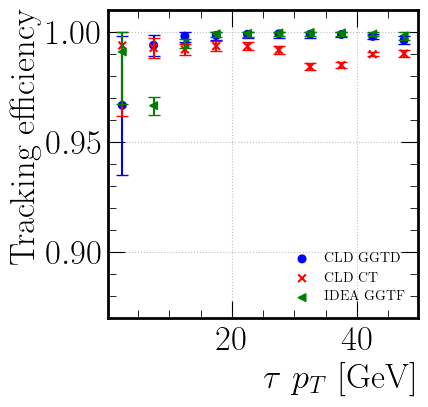

In [30]:
fig= plt.figure( figsize=(4, 4))
axs = fig.add_subplot(111)
colors_list = ["#FF0000", "#FF0000", "#0000FF"]
index = 0
j = 0
colors = [ "b", "r", "g", "y"]
marker = ["o", "x", "<", "s"]
labels = [ "CLD GGTD", "CLD CT", "IDEA GGTF"]
dataframe_list = [all_particles_CLD, all_particles_CLD_CT,all_particles_IDEA] #all_particles_IDEA
i =0 
plot_title =""
log = True
plt.xlabel(r"$\tau$ $p_T$ [GeV]")
plt.ylabel("Tracking efficiency")

for i in range(0, len(dataframe_list)):
    axs.scatter(
        dataframe_list[i]["energy_eff_tau"],
        dataframe_list[i]["eff_tau"],
        label=labels[i] ,
        marker=marker[i],
        c = [colors[i] for j in range(0,len(dataframe_list[i]["eff_tau"]))],
        s=30,
    )
    error_y = dataframe_list[i]["errors_tau"]
    yerr_lower, yerr_upper = limit_error_bars(np.array(dataframe_list[i]["eff_tau"]), np.array(error_y)/2, upper_limit=1)
    plt.errorbar(dataframe_list[i]["energy_eff_tau"], dataframe_list[i]["eff_tau"] ,yerr= [yerr_lower, yerr_upper], ecolor=colors[i], linestyle='none', capsize=4)

    # axs.errorbar(dataframe_list[i]["energy_eff"], dataframe_list[i]["eff"] , xerr=dataframe_list[i]["size_energy_bin"]/2,yerr= dataframe_list[i]["errors"], linestyle='none')

# if log:
#     log_ = "log"
#     axs.set_xscale("log")
# else:
#     log_ = ""
axs.set_ylim([0.7, 1.01])
# axs.legend(loc="lower left")

# axs.axvline(x=0.7, linestyle='--')

plt.legend(loc="lower right") #title=r'$Z/\gamma^* \rightarrow q \bar q (q=u,d)$' "\n" r"$\Delta_{MC}>0.02 \textrm{ rad}$")

# axs.xaxis.set_major_locator(plt.LogLocator(base=10.0, numticks=4))
# axs.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs='auto', numticks=10))
# axs.yaxis.set_major_locator(plt.MultipleLocator(0.1))
# axs.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
# axs.grid(which='major', linestyle=':', linewidth='0.5', color='black')
# axs.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
axs.grid()
# plt.xlim([1e-1,50])
plt.ylim([0.87,1.01])
plt.rc("text", usetex=True)
plt.rc("font", family="serif")
size_font = 25
plt.rcParams['font.size'] = size_font
plt.rcParams['axes.labelsize'] = size_font
plt.rcParams['xtick.labelsize'] = size_font
plt.rcParams['ytick.labelsize'] = size_font
plt.rcParams['legend.fontsize'] = 10

In [5]:

def calculate_eff_DeltaMC(sd, photons, dictlog_scale=False):
    bins = np.exp(np.arange(np.log(1e-3), np.log(1.5), 0.5))
    eff = []
    energy_eff = []
    total_showers_ = []
    errors_delta_mc = []
    for i in range(len(bins) - 1):
        bin_i = bins[i]
        bin_i1 = bins[i + 1]
        mask_above = sd.delta_MC.values <= bin_i1
        mask_below = sd.delta_MC.values > bin_i
        mask = mask_below * mask_above
        number_of_non_reconstructed_showers = np.sum(
            np.isnan(sd.pred_showers_E.values)[mask]
        )
        total_showers = len(sd.pred_showers_E.values[mask])
        if total_showers > 0:
            # purity_calc = sd["e_pred_and_truth"][mask].values/sd["pred_showers_E"][mask].values
            # more_than_4_hits = sd["pred_showers_E"][mask].values>3
            # total_reconstructed_cld_crit =  np.sum((purity_calc>=0.75)*more_than_4_hits)
            total_reconstructed_cld_crit = np.sum(sd["e_pred_and_truth"][mask].values>3)
            # particle_purity = sd["e_pred_and_truth"][mask].values/sd["reco_showers_E"][mask].values
            # track_purity = sd["e_pred_and_truth"][mask].values/sd["pred_showers_E"][mask].values
            # more_than_4_hits = sd["pred_showers_E"][mask].values>3
            # total_reconstructed_cld_crit =  np.sum((particle_purity>=0.5)*(track_purity>=0.5)*more_than_4_hits)
            print(bin_i, bin_i1, total_reconstructed_cld_crit, total_showers)
            eff.append(
                (total_reconstructed_cld_crit) / total_showers
            )
            energy_eff.append((bin_i1 + bin_i) / 2)
            total_showers_.append(total_showers)
            n_total = total_showers
            n_r = total_reconstructed_cld_crit
            error = (n_r/(n_total**2)*np.sqrt(n_total))**2+(1/n_total*np.sqrt(n_r))**2
            error = np.sqrt(error)
            errors_delta_mc.append(error)
    photons["eff_delta_MC"]= eff
    photons["delta_MC_values"]=energy_eff
    photons["errors_delta_mc"]=errors_delta_mc
    return photons

In [ ]:
# this data is without the tau momentum
# list_all_df_hdb = []
# path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_0_3mudataset_300924_500_600.pt"
# sd_hgb0, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
# path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_0_3mudataset_300924_600_800.pt"
# sd_hgb1, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
# path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_0_3mudataset_300924_800_1000.pt"
# sd_hgb2, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
# path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_0_3mudataset_300924_1_500.pt"
# sd_hgb3, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
# path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_0_3mudataset_300924_1000_2000.pt"
# sd_hgb4, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
# path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_0_3mudataset_300924_2000_4000.pt"
# sd_hgb5, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
# path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_0_3mudataset_300924_4000_6000.pt"
# sd_hgb6, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
# sd_hgb = pd.concat([sd_hgb0,sd_hgb1,sd_hgb2,sd_hgb3,sd_hgb4,sd_hgb5,sd_hgb6])
# path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_1_3mudataset_300924_500_600.pt"
# sd_hgb_ct0, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
# path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_1_3mudataset_300924_600_800.pt"
# sd_hgb_ct1, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
# path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_1_3mudataset_300924_800_1000.pt"
# sd_hgb_ct2, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
# path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_1_3mudataset_300924_1_500.pt"
# sd_hgb_ct3, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
# path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_1_3mudataset_300924_1_500.pt"
# sd_hgb_ct4, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
# path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_1_3mudataset_300924_2000_4000.pt"
# sd_hgb_ct5, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
# path_hgcal = "/eos/user/m/mgarciam/EVAL_REPOS/Tracking_CLD/models/230724/showers_df_evaluation/0_0_1_3mudataset_300924_4000_6000.pt"
# sd_hgb_ct6, matched_hgb = open_mlpf_dataframe(path_hgcal, False)
# sd_hgb_ct = pd.concat([sd_hgb_ct0,sd_hgb_ct1,sd_hgb_ct2,sd_hgb_ct3,sd_hgb_ct4,sd_hgb_ct5,sd_hgb_ct6])
